In [1]:
!pip install PyMuPDF pdfplumber pytesseract pdf2image pillow python-dateutil pandas
!sudo apt-get install poppler-utils tesseract-ocr tesseract-ocr-eng libtesseract-dev


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev poppler-utils
0 upgraded, 4 newly installed, 0 to remove and 30 not upgraded.
Need to get 3,929 kB of archives.
After this operation, 16.7 MB of additi

In [2]:
!pip install PyMuPDF pdf2image pdfplumber pytesseract Pillow python-dateutil
!sudo apt-get install poppler-utils tesseract-ocr tesseract-ocr-eng

import os
import fitz
from pdf2image import convert_from_path
import pdfplumber
import pytesseract
from PIL import Image
import io
import pandas as pd
from IPython.display import display, HTML, Markdown

def process_pdf(pdf_path):
    """Main processing function with direct Colab output"""

    # Initialize results dictionary
    results = {
        'metadata': {},
        'text': [],
        'tables': [],
        'images': [],
        'ocr_text': []
    }

    # Extract metadata
    with fitz.open(pdf_path) as doc:
        results['metadata'] = doc.metadata

    # Extract text and tables using pdfplumber
    with pdfplumber.open(pdf_path) as pdf:
        for page_num, page in enumerate(pdf.pages):
            # Text extraction
            text = page.extract_text()
            if text:
                results['text'].append(f"Page {page_num+1} Text:\n{text}\n{'='*50}")

            # Table extraction
            tables = page.extract_tables()
            for table_num, table in enumerate(tables):
                df = pd.DataFrame(table[1:], columns=table[0])
                results['tables'].append({
                    'page': page_num+1,
                    'table_num': table_num+1,
                    'dataframe': df
                })

    # Image extraction and OCR
    images = convert_from_path(pdf_path)
    for img_num, img in enumerate(images):
        # Save image to bytes
        img_byte_arr = io.BytesIO()
        img.save(img_byte_arr, format='JPEG')

        # OCR processing
        ocr_text = pytesseract.image_to_string(img)
        if ocr_text.strip():
            results['ocr_text'].append(f"Image {img_num+1} OCR Text:\n{ocr_text}\n{'='*50}")

        # Store image for display
        results['images'].append(img)

    return results

def display_results(results):
    """Display all results in Colab interface"""

    # Display metadata
    display(HTML("<h2>PDF Metadata</h2>"))
    display(pd.DataFrame.from_dict(results['metadata'], orient='index'))

    # Display extracted text
    display(HTML("<h2>Extracted Text</h2>"))
    display(Markdown("\n".join(results['text'])))

    # Display OCR text
    if results['ocr_text']:
        display(HTML("<h2>OCR Text from Images</h2>"))
        display(Markdown("\n".join(results['ocr_text'])))

    # Display tables
    if results['tables']:
        display(HTML("<h2>Extracted Tables</h2>"))
        for table in results['tables']:
            display(HTML(f"<h4>Page {table['page']} - Table {table['table_num']}</h4>"))
            display(table['dataframe'])

    # Display images
    display(HTML("<h2>Extracted Images</h2>"))
    for img in results['images']:
        display(img)



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


Saving Rhushya_resume_with_profile.pdf to Rhushya_resume_with_profile.pdf


,0
format,PDF 1.7
title,
author,Rhushya Kesagudu
subject,
keywords,
creator,Microsoft® Word 2021
producer,3.0.24 (5.1.10)
creationDate,D:20250117191534+05'30'
modDate,D:20250303051124+01'00'
trapped,


Page 1 Text:
RHUSHYA.K.C
portfolio | 7019292150| Mail| Linkedin | GitHub
I BELIVE IN MORE IMPLEMENTAION THAN TRADITIONAL APPROACH OF STUDYING FOR A
PROBLEM
EDUCATION
Degree/Course University / Board Year GPA/PRECENTAGE
B.Tech (COMPUTER SCIENCE AND University(PES,Banglore) (2022-present) 8.42(CGPA)
ENGINERRING)
Higher Secondary (PCMC) State(Kumarans, 2020-2022 88% (92%PCM)
Bangalore)
School ICSE(Baldwin, Banglore) 2008-2020 94 %
SKILLS
• Programming Languages: Python (proficient), C/C++ (intermediate), Java (moderate).
• Machine Learning ,MLOPS,NLP, Deep learning ,LLM model, Rag, Agentic AI, GENAI
with AWS Deployment : Langchain ,transformers,Hugging face , Llama index and other
frameworks to build ai based applications
• Full Stack(intermediate): Frontend(html + css + tailwindcss +js) and JS react ,Backend
(nodejs, expressjs) and have a knowledge
• Open Source
• Database management : MySql , MongoDb , supabase (open source)
• Communication:
• Management: scrum, agile
PROJECTS
• Machine Learning ,MLOPS,NLP, Deep learning ,LLM model GENAI with AWS Deployment
porjects :
• Gen ai Mult integrated application , Ai chat bot , Rag based chat document and several others
• Adblocker extension for chrome Browser
• Advance Hospital and Hotel Management in C++
• E-Commerce with Advance Filtering and sorting : React JS
EXPERINCE (INTERNSHIP)
RADISYS: LEARNT ABOUT THE 5G NETWORKS AND ITS DETIALED WORKING ARCHITECTURE
ACHIVEMENT
All – India Top 40 in Kodikon 3.0 Hackfest
PASSION
I am deeply passionate about leveraging my technical expertise in machine learning, NLP, Deep learning and
Gen AI , and full-stack to drive innovative solutions. With a strong foundation in Python and advanced
algorithms , I am eager to optimize processes and contribute to cutting-edge technology projects. My
commitment to continuous learning and passion inspires me to develop impactful, data-driven strategies within a
dynamic environment.
LANGUAGES
English: Expert
Kannada: Native
==================================================

Image 1 OCR Text:
RHUSHYA.K.C
portfolio | 7019292150] Mail| Linkedin | GitHub
| BELIVE IN MORE IMPLEMENTAION THAN TRADITIONAL APPROACH OF STUDYING FORA
PROBLEM

EDUCATION

 

 

Degree/Course University / Board Year GPA/PRECENTAGE

 

B.Tech (COMPUTER SCIENCE AND | University(PES,Banglore) (2022-present) | 8.42(CGPA)
ENGINERRING)

 

 

 

 

 

 

 

 

Higher Secondary (PCMC) State(Kumarans, 2020-2022 88% (92%PCM)
Bangalore)
School ICSE(Baldwin, Banglore) 2008-2020 94 %
SKILLS

e Programming Languages: Python (proficient), C/C++ (intermediate), Java (moderate).

e Machine Learning ,MLOPS,NLP, Deep learning ,LLM model, Rag, Agentic AI, GENAI
with AWS Deployment : | angchain ,transformers,Hugging face , Llama index and other
frameworks to build ai based applications

e Full Stack(intermediate): Frontend(htm! + css + tailwindcss +js) and JS react ,Backend
(nodejs, expressjs) and have a knowledge

e Open Source
e Database management : MySq! , MongoDb , supabase (open source)
e Communication:
e Management: scrum, agile
PROJECTS

 

e Machine Learning ,MLOPS,NLP, Deep learning ,LLM model GENAI with AWS Deployment
porjects :

e Gen ai Mult integrated application , Ai chat bot , Rag based chat document and several others
e Adblocker extension for chrome Browser
e Advance Hospital and Hotel Management in C++
e E-Commerce with Advance Filtering and sorting : React JS
EXPERINCE (INTERNSHIP)
RADISYS: LEARNT ABOUT THE 5G NETWORKS AND ITS DETIALED WORKING ARCHITECTURE
ACHIVEMENT

 

All — India Top 40 in Kodikon 3.0 Hackfest
PASSION

 

Iam deeply passionate about leveraging my technical expertise in machine learning, NLP, Deep learning and
Gen AI , and full-stack to drive innovative solutions. With a strong foundation in Python and advanced
algorithms , I am eager to optimize processes and contribute to cutting-edge technology projects. My
commitment to continuous learning and passion inspires me to develop impactful, data-driven strategies within a
dynamic environment.

LANGUAGES

 

English: Expert

Kannada: Native

==================================================

,Degree/Course,University / Board,Year,GPA/PRECENTAGE
0,B.Tech (COMPUTER SCIENCE AND\nENGINERRING),"University(PES,Banglore)",(2022-present),8.42(CGPA)
1,Higher Secondary (PCMC),"State(Kumarans,\nBangalore)",2020-2022,88% (92%PCM)
2,School,"ICSE(Baldwin, Banglore)",2008-2020,94 %


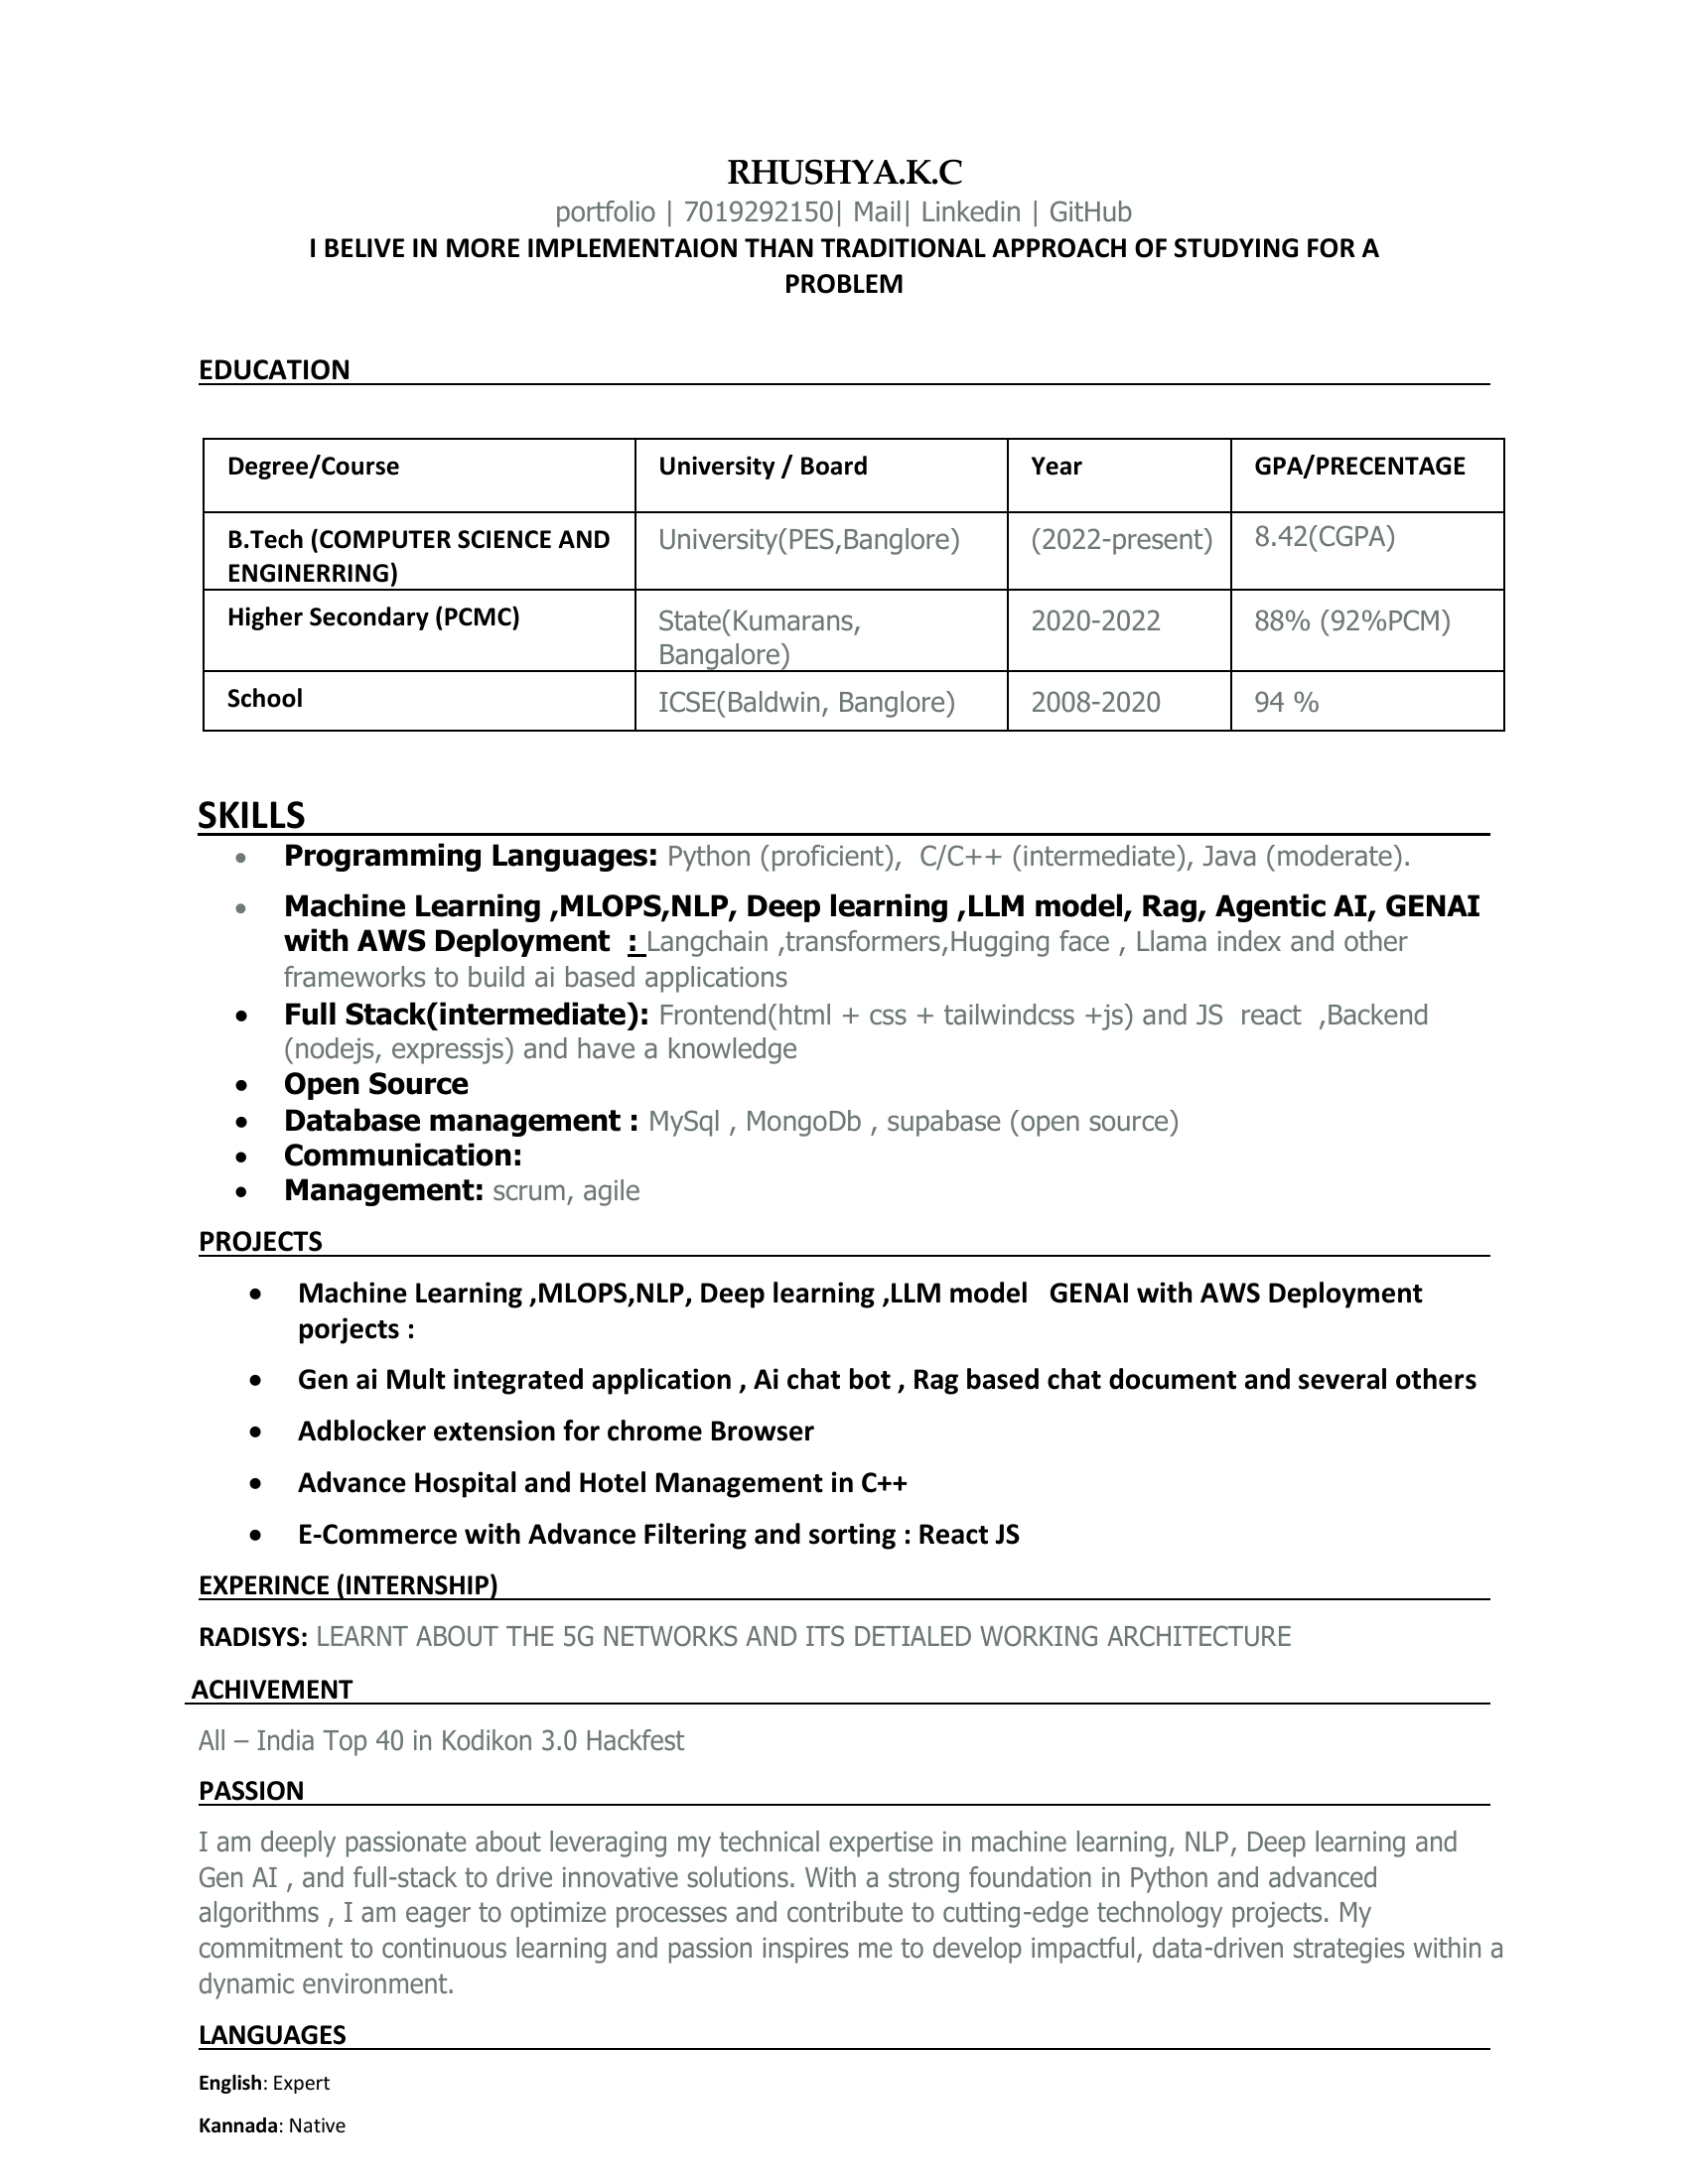

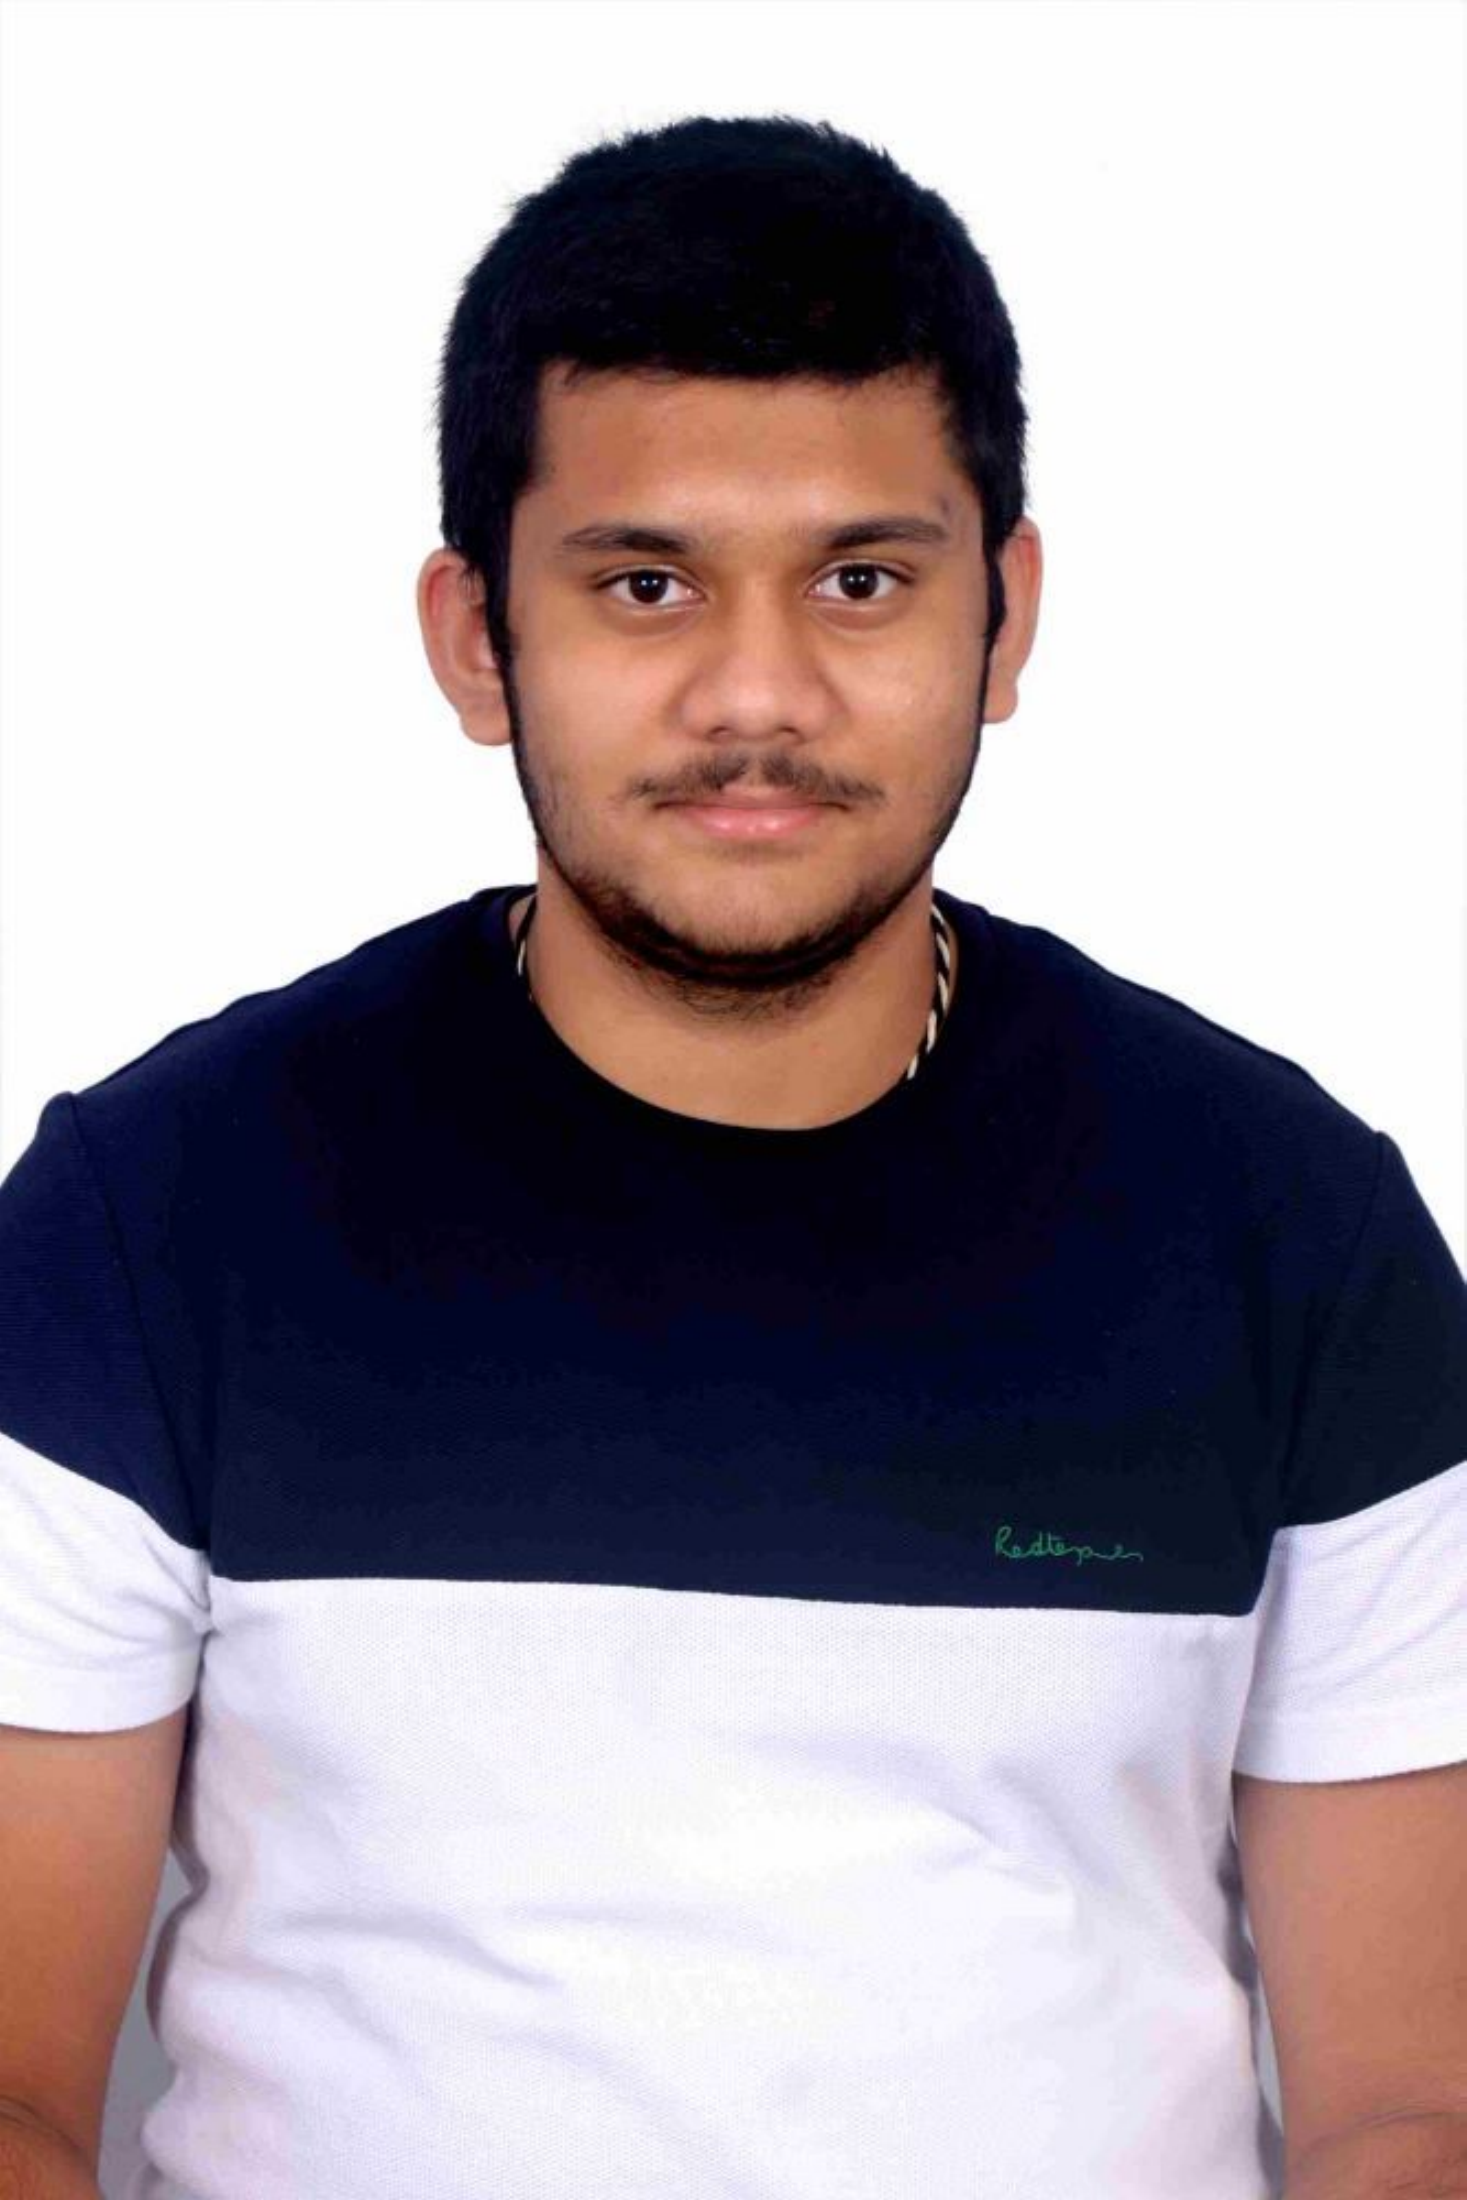

In [3]:
# Upload PDF file in Colab
from google.colab import files
uploaded = files.upload()

# Process and display results
pdf_file = list(uploaded.keys())[0]
results = process_pdf(pdf_file)
display_results(results)